In [118]:
import numpy as np
from utils import oned_well
import matplotlib.pyplot as plt
from tqdm import tqdm

In [119]:
well_length = 5
ground_energy = (2 * np.pi) ** 2 / (8 * well_length**2)
n_variables = 11
grid_size = well_length / (n_variables - 1)

print(ground_energy)

0.19739208802178715


In [120]:
generations = 250
generation_size = 10000
n_best = 100

for generation in tqdm((range(generations))):
    if generation == 0:
        population = np.random.random([generation_size, n_variables])
    scores = np.apply_along_axis(oned_well.compute_z, 1, population)
    # max_scores_index = np.argpartition(scores, -n_best)[-n_best:] # (si fuese maximizar)
    min_scores_index = np.argpartition(scores, n_best)[:n_best]
    best_individuals = population[min_scores_index]
    best_individuals_mean = best_individuals.transpose().mean(axis=1)
    best_individuals_std = best_individuals.transpose().std(axis=1)
    population = np.random.normal(
        best_individuals_mean, best_individuals_std, [generation_size, n_variables]
    )

scores = np.apply_along_axis(oned_well.compute_z, 1, population)
best_score = min(scores)
best_individual = population[np.argmin(scores)]
print(best_score)

100%|██████████| 250/250 [00:37<00:00,  6.64it/s]


0.03720958360831048


In [121]:
def Psi_n(n):
    return (2 / 5) ** 0.5 * np.sin(n * np.pi * np.linspace(0, 5, n_variables) / 5)


integral = 0
for i in range(len(best_individual)):
    integral = integral + (best_individual[i] ** 2) * (well_length / (n_variables - 1))

B = (1 / integral) ** 0.5
best_individual = B * best_individual

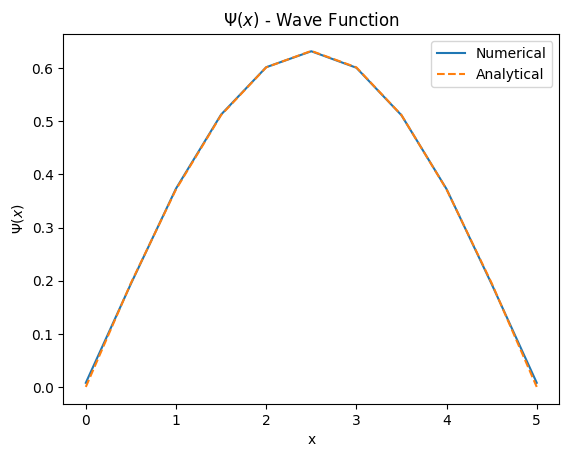

In [130]:
plt.plot(np.linspace(0, 5, n_variables), best_individual, label="Numerical")
plt.plot(np.linspace(0, 5, n_variables), Psi_n(1), "--", label="Analytical")
plt.gca().set_title("$\Psi(x)$ - Wave Function")
plt.gca().set_xlabel("x")
plt.gca().set_ylabel("$\Psi(x)$")
plt.legend()